In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [11]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_to_dogs.zip', origin = url, extract = True)

In [12]:
path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [13]:
train_dir = os.path.join(path, 'train')
valid_dir = os.path.join(path, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') 
train_dogs_dir = os.path.join(train_dir, 'dogs') 
validation_cats_dir = os.path.join(valid_dir, 'cats') 
validation_dogs_dir = os.path.join(valid_dir, 'dogs')

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 64
epochs = 30
IMG_H = 150
IMG_W = 150

train_img = ImageDataGenerator(rescale = 1./255, rotation_range=45, width_shift_range=0.15, height_shift_range=0.15, horizontal_flip = True, zoom_range=0.5)
valid_img = ImageDataGenerator(rescale = 1./255)

train_data = train_img.flow_from_directory(batch_size = 128, directory = train_dir, shuffle = True, target_size = (IMG_H, IMG_W), class_mode = 'binary')
valid_data = valid_img.flow_from_directory(batch_size = 128, directory = valid_dir, shuffle = True, target_size = (IMG_H, IMG_W), class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


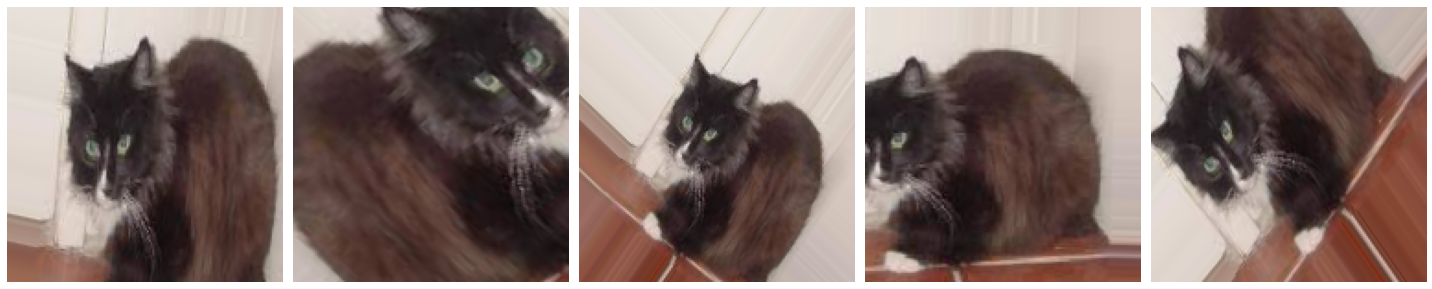

In [14]:
sample, _ = next(train_data)
augmented = [train_data[0][0][0] for i in range(5)]

def plotImg(imgs):
  fig, axes = plt.subplots(1, 5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(imgs, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

plotImg(augmented)

In [15]:

model = Sequential()

model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_H, IMG_W, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 37, 37, 128)      

In [17]:
history = model.fit_generator(
    train_data,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=valid_data,
    validation_steps=total_val // batch_size
)

Epoch 1/30
31/31 [==============================] - 33s 1s/step - loss: 0.6935 - accuracy: 0.5008 - val_loss: 0.6910 - val_accuracy: 0.4984
Epoch 2/30
31/31 [==============================] - 34s 1s/step - loss: 0.6919 - accuracy: 0.5158 - val_loss: 0.6734 - val_accuracy: 0.5053
Epoch 3/30
31/31 [==============================] - 33s 1s/step - loss: 0.6884 - accuracy: 0.5522 - val_loss: 0.6889 - val_accuracy: 0.5299
Epoch 4/30
31/31 [==============================] - 33s 1s/step - loss: 0.6779 - accuracy: 0.5719 - val_loss: 0.6607 - val_accuracy: 0.6036
Epoch 5/30
31/31 [==============================] - 32s 1s/step - loss: 0.6684 - accuracy: 0.5991 - val_loss: 0.6440 - val_accuracy: 0.6143
Epoch 6/30
31/31 [==============================] - 32s 1s/step - loss: 0.6544 - accuracy: 0.6209 - val_loss: 0.6247 - val_accuracy: 0.6207
Epoch 7/30
31/31 [==============================] - 31s 1s/step - loss: 0.6416 - accuracy: 0.6307 - val_loss: 0.5660 - val_accuracy: 0.6854
Epoch 8/30
31/31 [==

<Figure size 432x288 with 0 Axes>

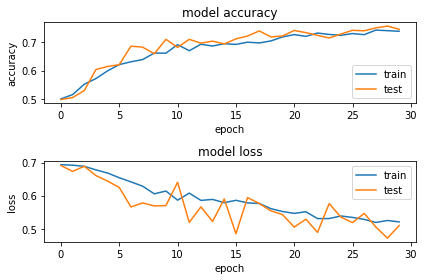

<Figure size 432x288 with 0 Axes>

In [18]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.figure()